<a href="https://colab.research.google.com/github/Shrey-Viradiya/HandsOnMachineLearning/blob/master/Deep_Computer_Vision_using_Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Computer Vision using Convolution Neural Network

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [3]:
from sklearn.datasets import load_sample_image
import numpy as np

In [4]:
china = load_sample_image('china.jpg')/255
flower = load_sample_image('flower.jpg')/255
images = np.array([china, flower])
batch_size , height, width, channels = images.shape

In [5]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [6]:
outputs = tf.nn.conv2d(images, filters, strides= 1, padding='SAME')

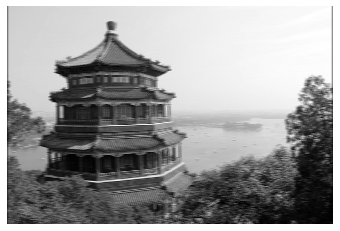

In [7]:
plot_image(outputs[0, :, :, 1])

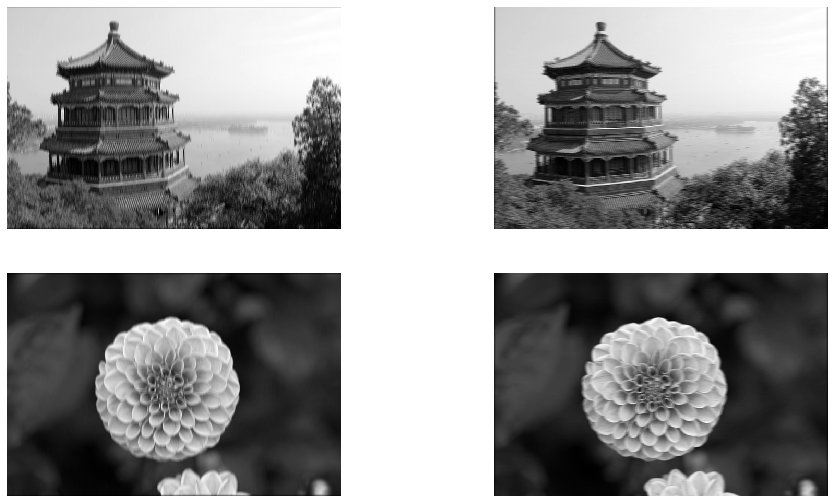

In [8]:
plt.figure(figsize = (16,9))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

## Pooling layer

### Max pooling

In [9]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [10]:
output = max_pool(images)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [11]:
images.shape

(2, 427, 640, 3)

In [12]:
output.shape

TensorShape([2, 213, 320, 3])

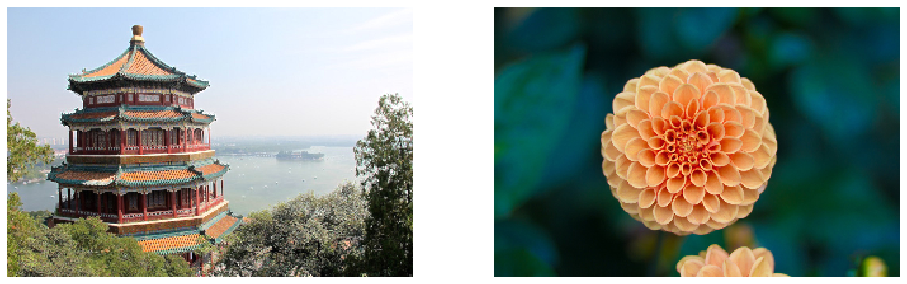

In [13]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plot_color_image(output[0,:,:,:])
plt.subplot(122)
plot_color_image(output[1,:,:,:])

### Depth-wise pooling

In [14]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.pool_size),
                              padding=self.padding)

In [15]:
depth_pool = DepthMaxPool(3)
with tf.device("/cpu:0"):
    depth_output = depth_pool(images)
depth_output.shape


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



TensorShape([2, 427, 640, 1])

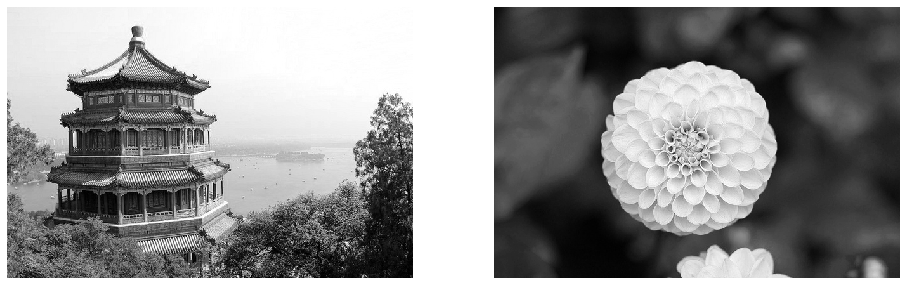

In [16]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plot_image(depth_output[0,:,:,0])
plt.subplot(122)
plot_image(depth_output[1,:,:,0])

### Average pooling

In [17]:
avg_pool = keras.layers.AvgPool2D(pool_size = 2)

In [18]:
output_avg = avg_pool(images)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [19]:
output_avg.shape

TensorShape([2, 213, 320, 3])

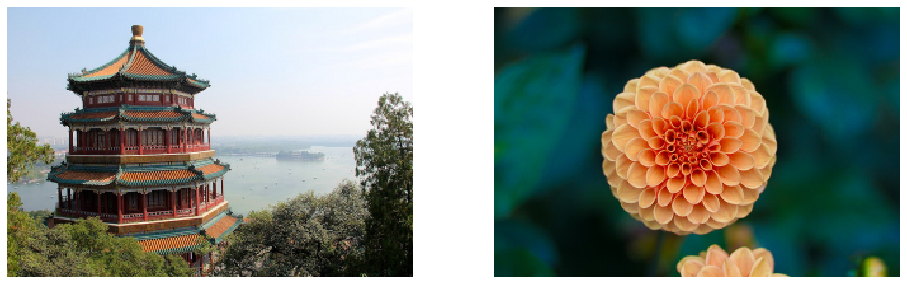

In [20]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plot_color_image(output_avg[0,:,:,:])
plt.subplot(122)
plot_color_image(output_avg[1,:,:,:])

## CNN Architectures

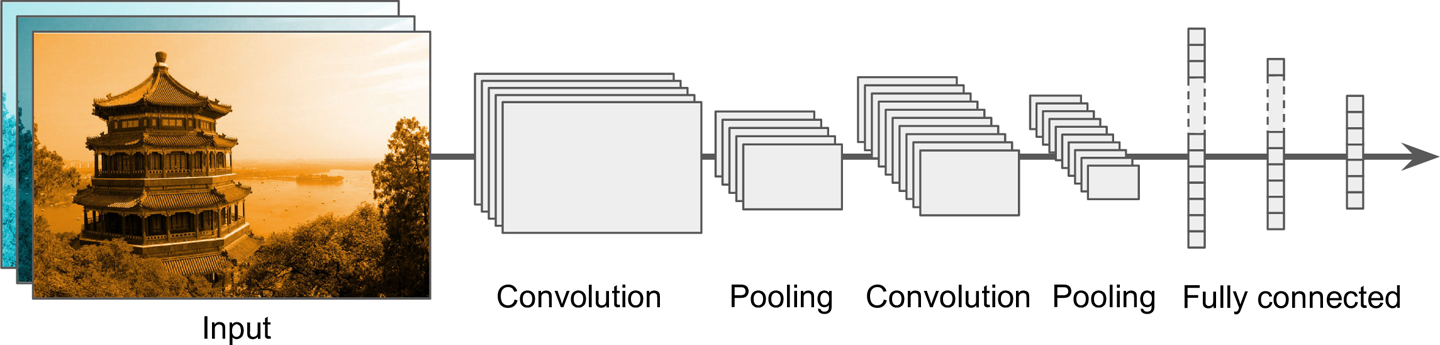

### Tackling Fashion MNIST With a CNN

In [21]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [22]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [23]:
X_mean = X_train.mean(axis = 0, keepdims=True)
X_std = X_train.std(axis = 0, keepdims=True)+ 1e-7

In [24]:
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [25]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Lambda(tf.nn.local_response_normalization),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8106 - accuracy: 0.7146 - val_loss: 0.4137 - val_accuracy: 0.8534
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4572 - accuracy: 0.8478 - val_loss: 0.3599 - val_accuracy: 0.8708
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3903 - accuracy: 0.8695 - val_loss: 0.3263 - val_accuracy: 0.8824
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3552 - accuracy: 0.8827 - val_loss: 0.3163 - val_accuracy: 0.8864
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3333 - accuracy: 0.8880 - val_loss: 0.3356 - val_accuracy: 0.8800
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3167 - accuracy: 0.8939 - val_loss: 0.3009 - val_accuracy: 0.8898
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3014 - accuracy: 0.9001 - val_loss: 0.2843 - val_ac

In [27]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3031 - accuracy: 0.8990


In [28]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6918 - accuracy: 0.7599 - val_loss: 0.3823 - val_accuracy: 0.8664
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4282 - accuracy: 0.8564 - val_loss: 0.3260 - val_accuracy: 0.8798
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3721 - accuracy: 0.8755 - val_loss: 0.2994 - val_accuracy: 0.8892
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3317 - accuracy: 0.8880 - val_loss: 0.2780 - val_accuracy: 0.8996
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3151 - accuracy: 0.8938 - val_loss: 0.2915 - val_accuracy: 0.8942
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2925 - accuracy: 0.8988 - val_loss: 0.2862 - val_accuracy: 0.9014
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2806 - accuracy: 0.9041 - val_loss: 0.2870 - val_ac

In [30]:
score

[0.29790738224983215, 0.9003000259399414]

## ResNet-34

In [31]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size = 3, strides = 1, padding='SAME', use_bias=False)

In [32]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides = 1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
                            DefaultConv2D(filters, strides = strides),
                            keras.layers.BatchNormalization(),
                            self.activation,
                            keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                                DefaultConv2D(filters, kernel_size = 1, strides = strides),
                                keras.layers.BatchNormalization()]
            

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [33]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[224, 224, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 112, 112, 64)      3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        37376     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        37376     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

In [35]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_mean = X_train.mean(axis = 0, keepdims=True)
X_std = X_train.std(axis = 0, keepdims=True)+ 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [36]:
X_train = X_train[:30000]

In [37]:
y_train = y_train[:30000]

In [38]:
X_train.shape

(30000, 28, 28, 1)

In [39]:
X_test.shape

(10000, 28, 28, 1)

In [40]:
X_valid.shape

(5000, 28, 28, 1)

In [41]:
X_train = tf.image.resize(X_train, [224,224])
X_test = tf.image.resize(X_test, [224,224])
X_valid = tf.image.resize(X_valid, [224,224])

In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/10
938/938 [==============================] - 115s 123ms/step - loss: 0.5168 - accuracy: 0.8164 - val_loss: 1.4279 - val_accuracy: 0.7036
Epoch 2/10
938/938 [==============================] - 114s 121ms/step - loss: 0.3088 - accuracy: 0.8871 - val_loss: 0.3959 - val_accuracy: 0.8658
Epoch 3/10
938/938 [==============================] - 113s 121ms/step - loss: 0.2541 - accuracy: 0.9078 - val_loss: 0.2680 - val_accuracy: 0.9002
Epoch 4/10
938/938 [==============================] - 113s 120ms/step - loss: 0.2144 - accuracy: 0.9214 - val_loss: 0.4984 - val_accuracy: 0.8410
Epoch 5/10
938/938 [==============================] - 113s 120ms/step - loss: 0.1795 - accuracy: 0.9344 - val_loss: 0.2511 - val_accuracy: 0.9096
Epoch 6/10
938/938 [==============================] - 112s 120ms/step - loss: 0.1478 - accuracy: 0.9469 - val_loss: 0.3545 - val_accuracy: 0.8830
Epoch 7/10
938/938 [==============================] - 112s 120ms/step - loss: 0.1156 - accuracy: 0.9578 - val_loss: 0.2997 -

In [43]:
score

[0.40618985891342163, 0.9031000137329102]